
<h1> <center> <b> <u> AvoCare </u></b></center></h1><br>
Company Introduction
Your client for this project is a major Avocado Producer.

Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

<h1>Problem Statement : </h1><br>

Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.<br>
Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.<br>
The price of avocado is dependent on global demands and seasonal production.
Due to these reasons, it is quite difficult to know for certain the price in the future.


<h1> <b><center>Dataset Description</center></b></h1>

<table>	<th>	Column Name	</th>	<th>	Description	</th>	
<tr>	<td>	Id	</td>	<td>	Unique identity of each observation	</td>	<tr>
<tr>	<td>	Date	</td>	<td>	The date of the observation	</td>	<tr>
<tr>	<td>	AveragePrice	</td>	<td>	The average price of a single avocado	</td>	<tr>
<tr>	<td>	Total Volume	</td>	<td>	Total number of avocados sold.	</td>	<tr>
<tr>	<td>	4046	</td>	<td>	Total number of avocados with PLU 4046 sold.	</td>	<tr>
<tr>	<td>	4225	</td>	<td>	Total number of avocados with PLU 4770 sold.	</td>	<tr>
<tr>	<td>	4770	</td>	<td>	Total number of avocados with PLU 4770 sold.	</td>	<tr>
<tr>	<td>	Total Bags	</td>	<td>	Total number of bags sold.	</td>	<tr>
<tr>	<td>	Small Bags	</td>	<td>	Total number of small bags sold.	</td>	<tr>
<tr>	<td>	Large Bags	</td>	<td>	Total number of large bags sold.	</td>	<tr>
<tr>	<td>	sugarpercent	</td>	<td>	Total number of extra-large bags sold.	</td>	<tr>
<tr>	<td>	type	</td>	<td>	Type of an avocado (conventional or organic).	</td>	<tr>
<tr>	<td>	year	</td>	<td>	The year of observation.	</td>	<tr>
<tr>	<td>	Region	</td>	<td>	The city or region of the observation.	</td>	<tr>


# Importing Important Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import profile_report

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [9]:
train_data = pd.read_csv('avocado_train.csv')
print(train_data.shape)
train_data.head()

(14599, 14)


,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [10]:
test_data = pd.read_csv('avocado_test.csv')
print(test_data.shape)
test_data.head()

(3650, 13)


,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


In [13]:
train_data.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [16]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

## Generating Profile Report

In [19]:
PR = train_data.profile_report(title="PR")
PR.to_file('PR.html')

## Profiling of the Dataset

- Number of variables	14
- Number of observations	14599
- Missing cells	0

<b> Variable types</b>

- Numeric	10
- DateTime	1
- Categorical	3<br>

#### Dataset Findings
- 1 - ID - Unique Id 
- 2 - Date - 169 Total Dates. First -Dec 2014 Last - Mar 2018
- 3 - <b> Average Price</b> - Target Variable - Min - 0.44,Max - 3.25, Mean - 1.40 ,Range -2.81 
- 4 - type - Conventional & Organice. Almost equally distributed
- 5 -  Yearwise Split - 2015 to 2018(Partial)
- 6 - regionwise 54 regionwise
- 7-14 - Rest all are continous variable


# Exploratory Data Analysis

### Q1 - What is the Day on Day trend of Average Price of Avocado

<AxesSubplot:xlabel='Date'>

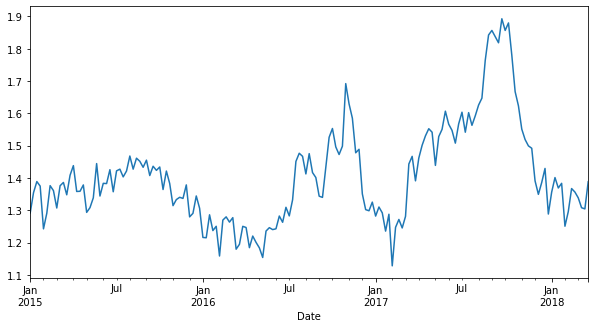

In [27]:
plt.figure(figsize=(10,5))
train_data.groupby(by='Date').mean()['AveragePrice'].plot()

### Insights - Initially the average price of Avocado was 1.3. Peak can be seen everytime  from July to Nov

### Q2 - What is the Average Volume - Day on Day

<AxesSubplot:xlabel='Date'>

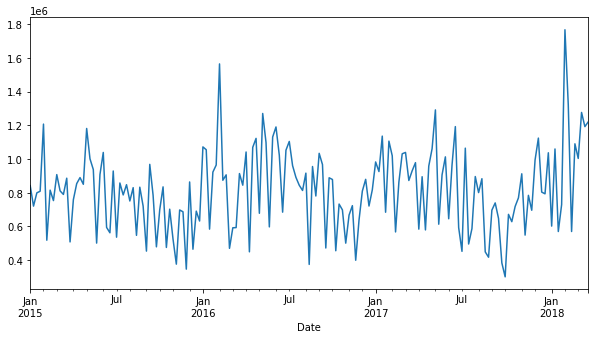

In [34]:
plt.figure(figsize=(10,5))
train_data.groupby(by='Date').mean()['Total Volume'].plot()

### Insights - Average Volume  can be seen higher in Mar to Jul Range of every year

### Q3 - Type of Avocado with Respect to Average Price & Avg Volumes sold

<AxesSubplot:xlabel='Date'>

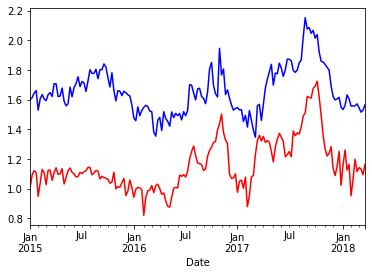

In [42]:
train_data[train_data['type']=='conventional'].groupby(by='Date').mean()['AveragePrice'].plot(color='red')
train_data[train_data['type']=='organic'].groupby(by='Date').mean()['AveragePrice'].plot(color='blue')

### Insights - Average Price of Organic Avocado is compartively higher 

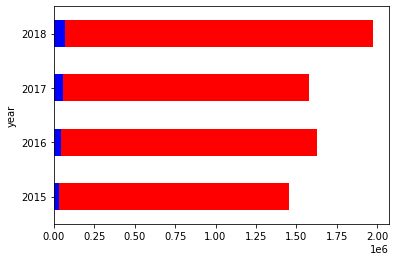

In [53]:
train_data[train_data['type']=='conventional'].groupby(by='year').mean()['Total Volume'].plot(kind='barh',color='red');
train_data[train_data['type']=='organic'].groupby(by='year').mean()['Total Volume'].plot(kind='barh',color='blue');


### Insight - Sales of Conventional Avocado is very high as compared to organic avocado

In [54]:
train_data.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

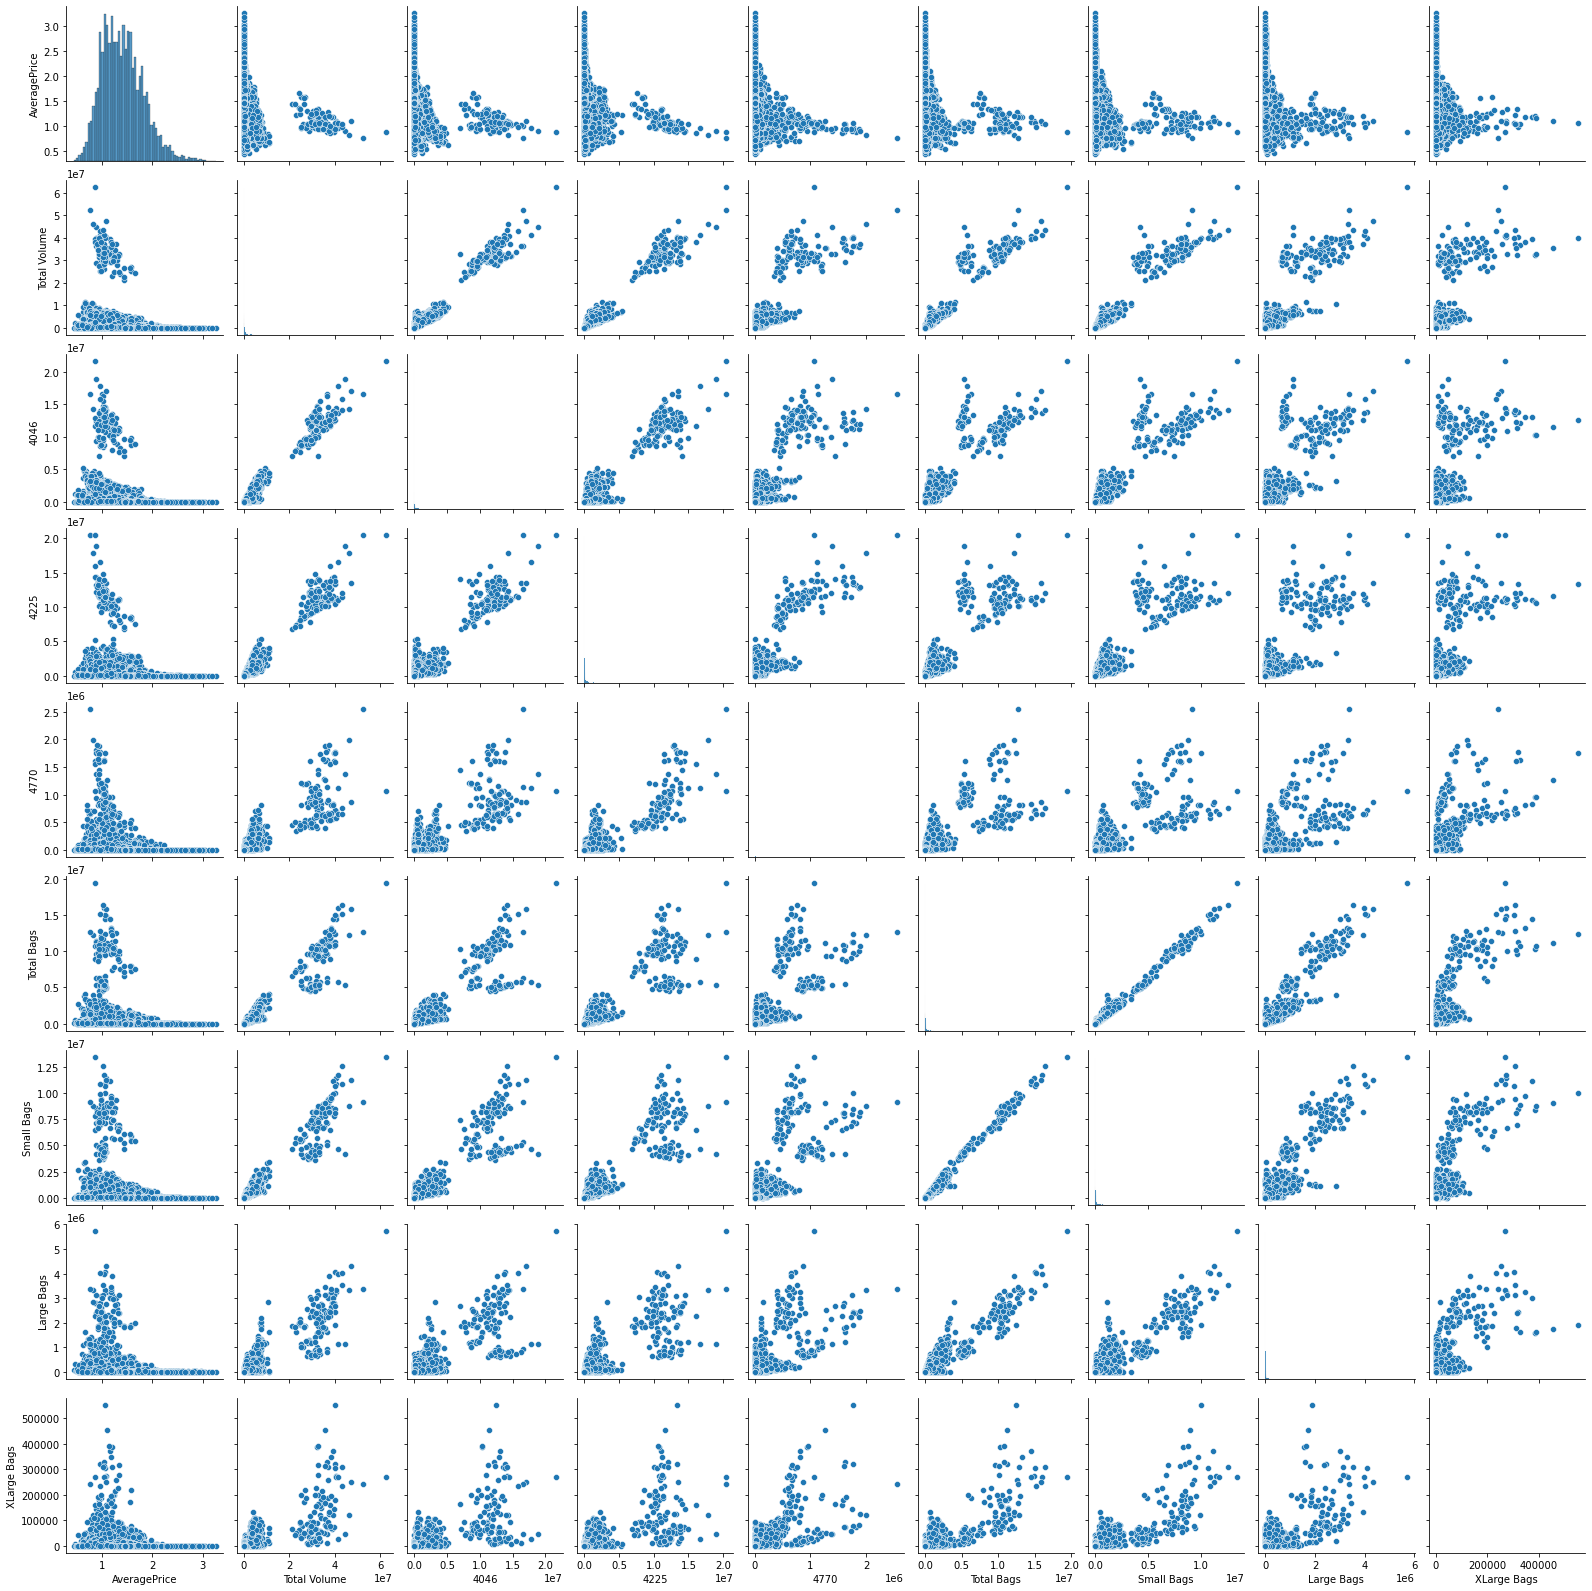

In [61]:
sns.pairplot(train_data.drop(['Id','year'],axis=1))

In [62]:
train_data.corr()['AveragePrice']

Id              0.582187
AveragePrice    1.000000
Total Volume   -0.194316
4046           -0.210214
4225           -0.173584
4770           -0.178898
Total Bags     -0.178161
Small Bags     -0.175261
Large Bags     -0.174219
XLarge Bags    -0.118503
year            0.099698
Name: AveragePrice, dtype: float64

In [134]:
train_data.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [135]:
RemCols = ['year','Id','Date','region','AveragePrice']

In [136]:
X = train_data.drop(RemCols,axis=1)

In [137]:
X = pd.get_dummies(X,drop_first=True)
print(X.shape)

(14599, 9)


In [138]:
y = train_data['AveragePrice']
print(y.shape)

(14599,)


In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11679, 9) (2920, 9) (11679,) (2920,)


In [140]:
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.transform(X_test)
X_test.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic
169,0.154410,0.610487,-0.085025,-0.164720,-0.116525,-0.108754,-0.124567,-0.173008,-0.997691
8466,-0.244137,-0.231137,-0.241021,-0.208588,-0.240128,-0.242557,-0.213941,-0.173008,1.002315
3013,-0.238763,-0.231042,-0.222908,-0.212253,-0.243228,-0.244327,-0.221033,-0.173008,1.002315
1475,-0.234676,-0.230879,-0.217854,-0.211589,-0.235440,-0.244538,-0.188969,-0.173008,1.002315
13797,-0.217594,-0.214225,-0.222777,-0.206502,-0.191657,-0.203186,-0.139247,-0.167358,-0.997691


# 1 - Linear Regression Model

In [141]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [142]:
LinPredValues_train = LinReg.predict(X_train)
LinPredValues_test = LinReg.predict(X_test)

In [143]:
RMSE_train = print(np.sqrt(mean_squared_error(y_train,LinPredValues_train)))
RMSE_test = print(np.sqrt(mean_squared_error(y_test,LinPredValues_test)))

0.3147499387955422
0.31002026425754836


# 2 - Decision Tree Regressor

In [144]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [145]:
DTR_train = DTR.predict(X_train)
DTR_test = DTR.predict(X_test)

In [146]:
RMSE_train_DTR = print(np.sqrt(mean_squared_error(y_train,DTR_train)))
RMSE_test_DTR = print(np.sqrt(mean_squared_error(y_test,DTR_test)))

5.6268848528181804e-18
0.2794426939071447


# 3 - Random Forest Regressor

In [147]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [148]:
RF_train = RF.predict(X_train)
RF_test = RF.predict(X_test)

In [149]:
RMSE_train_RF = print(np.sqrt(mean_squared_error(y_train,RF_train)))
RMSE_test_RF = print(np.sqrt(mean_squared_error(y_test,RF_test)))

0.07441277464289274
0.19665535996443045


### Using Random Forest Regressor we are getting less RMSE, hence will apply this project

In [152]:
X1 = test_data.drop(['year','Id','Date','region'],axis=1)

In [155]:
X1 = pd.get_dummies(X1,drop_first=True)
print(X.shape)

(14599, 9)


In [156]:
X1[X1.columns] = SS.transform(X1)

In [158]:
pred_values = RF.predict(X1)

In [160]:
final=pd.DataFrame(test_data['Id'])

In [162]:
final['pred'] = pred_values

In [164]:
final.to_csv('submission.csv',header=False,index=False)